**Stochastic Thinking and Randomness**

- Behavior of the physical world cannot be predicted
- - Cannot precisely measure position and momentum of particle at the same time (Heisenberg uncertaintity)

We can say --> "x is highly likely to occur"
We cannot say --> "x is certain to occur"


***The moral***
- The world might or might not be inherently unpredictable
- Even if not, lack of knowledge prevents precise predictions
- Therefore, we can treat the world as inherently unpredictable

`Causal nondeterminism`: Some events are truly random
`Predictive nondeterminism`: In principle might be able to predict, but don't have enough info. There is chaos, but not randomness

Use a stochastic process to represent systems or model phenomena that seem to behave in a random way

Examples:

1. Systems with choices in state transitions
- Motion of particles in a fluid
- Outcomes of a play in football

2. Systems where measurement is uncertain or noisy
- Polling data
- Radio astronomy

3. Systems where we can't measure all factors
- Weather systems

Others:
- Stochastic Gradient Descent: deep learning
- Google's page rank search algorithm


**Stochastic Processes**
- In general, a system often can be defined by a set of state variables and processes that determine the transition to a next set of values for those variables
- - Causal: A car's state a t is x,v,a and state at a later time is determined by those parameters and actions of the driver

- In a stochastic system, the process for determining next state depends on previous states and on some random element
- This will require a change in how we think about building computational models of the world



In [ ]:
import random

def roll_die():
    return random.choice([1, 2, 3, 4, 5, 6])

def test_roll(n):
    result = ''
    for _ in range(n):
        result += ' ' + str(roll_die())

    return result

for _ in range(10):
    print(test_roll(5))

 2 5 3 2 5
 4 4 6 2 2
 3 3 2 5 4
 6 4 6 6 2
 5 6 6 1 3
 2 2 6 6 5
 5 2 1 2 2
 1 6 4 3 2
 6 4 3 3 5
 1 5 6 5 1


Discrete Probability is About Counting

- Count total possible events (called the universe of events)
- Count number of events that have the property of interest

- Divide second number by the first

Probability of rolling 11111

All events: 6^5

Probability: 1 / 6^5

Probabilities are always in the range 0 to 1
- 0 if impossible
- 1 if guranteed

If probability of event ocurring is p then probability of it not ocurring is 1-p

When estimating probaibilities include multiple events, start with asking whether they are `independent` of each other

***Independence***
- Two events are independent if the outcome of one event has no influence on the outcome of the other
- Independence should not be taken for granted



### Simulating Probabilities

- Going to explore simulation of rolling a group of dice many time
- First of many simulations we will say

**Simulation**:
- Run many trials in which we select one event from the universe of possible events
- For each trial, compute some propertiues
- Report some stats about propoerties over set of trials

In [ ]:
def run_sim(goal, num_trials):
    total = 0
    for i in range(num_trials):
        if i != 0 and i % 100_000 == 0:
            print(f"Starting trial {i}")
        result = ''
        for _ in range(len(goal)):
            result += str(roll_die())

        if result == goal:
            total += 1

    print(f"Actual probability of {goal} = {1 / 6**len(goal):.8f}")
    print(f"Estimated probability of {goal} = {total / num_trials:.8f}")

run_sim('11111', 1000)

Actual probability of 11111 = 0.00012860
Estimated probability of 11111 = 0.00000000


We get an estimated probability of 0 because in 1000 trials we were unlikely to observe one event in that universe with enough frequency to estimate accurately



In [3]:
run_sim('11111', 10_000_000)

Starting trial 100000
Starting trial 200000
Starting trial 300000
Starting trial 400000
Starting trial 500000
Starting trial 600000
Starting trial 700000
Starting trial 800000
Starting trial 900000
Starting trial 1000000
Starting trial 1100000
Starting trial 1200000
Starting trial 1300000
Starting trial 1400000
Starting trial 1500000
Starting trial 1600000
Starting trial 1700000
Starting trial 1800000
Starting trial 1900000
Starting trial 2000000
Starting trial 2100000
Starting trial 2200000
Starting trial 2300000
Starting trial 2400000
Starting trial 2500000
Starting trial 2600000
Starting trial 2700000
Starting trial 2800000
Starting trial 2900000
Starting trial 3000000
Starting trial 3100000
Starting trial 3200000
Starting trial 3300000
Starting trial 3400000
Starting trial 3500000
Starting trial 3600000
Starting trial 3700000
Starting trial 3800000
Starting trial 3900000
Starting trial 4000000
Starting trial 4100000
Starting trial 4200000
Starting trial 4300000
Starting trial 44000

Here, estimated probability is much closer


***Morals:***
1. It takes a lot of trials to get a good estimate of the frequency of occurence of a rare event. We'll talk later about how to know when we have enough trials to trust the estimate
2. One should not confuse sample probability with the actual probability
3. There is no reason to do this by simulation because there is a closed form answer. There are cases where we don't

Simulations are used a lot
- To model systems that are mathematically intractable
- - Otherwise may not be possible to analyze a system
- To extract useful intermediate results
- To support iterative development by sucessive refinement
- - Start with basic system, then incrememntally add features
- To support exploring of variations by asking "what if" questions

## Random Walks

- Method to model a system where
- - Objects start at a location and choose a random direction in which to take a step
- - Distribution can be different depending on object types and environmental condiotions

Modeling stocks:
- Gaussian random walk, step size is chosen from a normal distribution

In population genetuics, random walk is used to describe evolution

**Our Random Walk: The Drunkard's Walk**
- A random walk on a 2D surface
- Start with some initial location
- Initially, step is a fixed distance
- Step is taken in a direction chosen randomly from a set of choices

- We will use a probabilistic simulation
- - Won't yield precisely correct answer
- - But should yield a good approximation

Modeling Random Walks
1. Perform an experiment where you take d steps at random based on some distribution and ask some questions about what happened
- e.g. distance from starting point
2. With many experiment trials/repitions, what is the average distance away from the start location
- sampling space of possible events
3. Can't sample all events, so want to draw statistical conclusions about events

Structure
1. Simulate one walk of `d` steps
- - Record distance from start at end of walk
- - Record final location at end of walk
2. Simulate `n` such walks, each of `d` steps
- Record all distances and final locations
3. Report average distance from origin over set of `n` walks
- How does this change as we increase `d`?

This is called a ***monte carlo simulation***

A method of estimating the value of an unknown quantity using principles of inferential statistics

**Inferential statistics**
- Population: a set of examples
- Sample: a proper subset of a population
- Key fact: A random sample tends to exhibit the same properties as the population from which it is drawn
- - Provided that the sample is sufficiently large and random

Abstractions:
1. Location --> a place
- An object, like a drunk, has a location
- Location can change as object moves

2. Field --> a collection of drunks with locations
- Store those locations occupied by drunks

More memory efficient to build model around locations occupied by drunks (adjacency list)

Overall plan

Field
- Implicit collection of locations
- Explicity represent only locations occupied by drunks
- Associate location directly with a drunk
- Represent by collection of drunks

Drunk
- can move, change location

Simulation
- create one or more drunks with initial locations
- Randomly move d steps, record final loc, distance from start
- Do this n times and measure average final distance and collect final locations


In [ ]:
class Location(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def dist_from(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()

        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ',' + str(self.y) + '>'


class Drunk(object):
    def __init__(self, name=None):
        self.name = name

    def __str__(self):
        if self != None:
            return self.name

        return 'Anonymous'

class Usual_drunk(Drunk):
    def take_step(self):
        step_choices = [(0, 1), (0, -1), (1, 0), (-1, 0)]

        return random.choice(step_choices)


class Masochist_drunk(Drunk):
    def take_step(self):
        step_choices = [(0.0, 1.1), (0.0, -0.9), (1.0,0.0), (-1.0, 0.0)]

        return random.choice(step_choices)


class Liberal_drunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,1.0), (0.0,-1.0),
                       (0.9, 0.0), (-1.1, 0.0)]
        return random.choice(step_choices)

class Conserative_drunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,1.0), (0.0,-1.0),
                       (1.1, 0.0), (-0.9, 0.0)]
        return random.choice(step_choices)

class Liberal_masochist_drunk(Masochist_drunk):
    def take_step(self):
        if random.choice([True, False]):
            step_choices = [(0.0,1.0), (0.0,-1.0),
                           (0.9, 0.0), (-1.1, 0.0)]
            return random.choice(step_choices)
        else:
            return Masochist_drunk.take_step(self)

class Corner_drunk(Drunk):
    def take_step(self):
        step_choices = [(0.71, 0.71), (0.71, -0.71),
                       (-0.71, 0.71), (-0.71, -0.71)]
        return random.choice(step_choices)

class Continuous_drunk(Drunk):
    def take_step(self):
        delta_func = lambda: (random.random() if random.random() < 0.5\
            else -random.random())
        delta_x = delta_func()
        delta_y = delta_func()
        return (delta_x, delta_y)

In [ ]:
class Field(object):
    def __init__(self):
        self.drunks = {}

    def add_drunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError("Duplicate drunk")

        else:
            self.drunks[drunk] = loc

    def get_loc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')

        return self.drunks[drunk]

    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')

        x_dist, y_dist = drunk.take_step()

        self.drunks[drunk] = self.drunks[drunk].move(x_dist, y_dist)



def walk(f, d, num_steps):

    start = f.get_loc(d)
    for s in range(num_steps):
        f.move_drunk(d)

    return start.dist_from(f.get_loc(d))

def sim_walks(num_steps, num_trials, d_class):
    Homer = d_class('Homer')

    origin = Location(0, 0)

    distances = []

    for t in range(num_trials):
        f = Field()
        f.add_drunk(Homer, origin)
        distances.append(round(walk(f, Homer, num_steps), 1))

    return distances

def drunk_test(walk_lengths, num_trials, d_class):
    """Assumes walk_lengths a sequence of ints >= 0
         num_trials an int > 0, d_class a subclass of Drunk
       For each number of steps in walk_lengths, runs
       sim_walks with num_trials walks and prints results"""
    for num_steps in walk_lengths:
        distances = sim_walks(num_steps, num_trials, d_class)
        print(d_class.__name__, 'random walk of', num_steps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))


drunk_test((10, 100, 1000, 10000), 100, Usual_drunk)

Usual_drunk random walk of 10 steps
 Mean = 2.653
 Max = 6.0 Min = 0.0
Usual_drunk random walk of 100 steps
 Mean = 9.283
 Max = 24.7 Min = 0.0
Usual_drunk random walk of 1000 steps
 Mean = 27.387
 Max = 69.4 Min = 2.8
Usual_drunk random walk of 10000 steps
 Mean = 96.331
 Max = 193.3 Min = 8.5


Smoke test
- Try simulation on cases where we think we know the answer


These map to about the square root of the number of steps



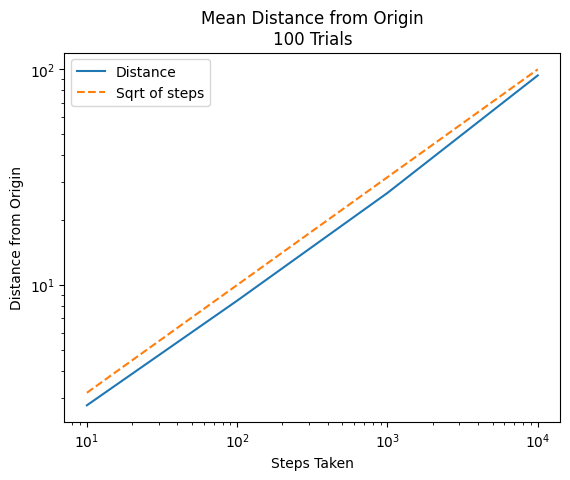

In [14]:
import matplotlib.pyplot as plt
def plot_drunk_test(walk_lengths, num_trials, d_class):
    """Assumes walk_lengths a sequence of ints >= 0
         num_trials an int > 0, d_class a subclass of Drunk
       Plots the average distance for each walk length and
         the sqrt of each walk length"""
    means = []
    for wl in walk_lengths:
        distances = (sim_walks(wl, num_trials, d_class))
        means.append(sum(distances)/len(distances))
    plt.plot(walk_lengths, means, label = 'Distance')
    roots = [wl**0.5 for wl in walk_lengths]
    plt.plot(walk_lengths, roots, '--', label = 'Sqrt of steps')
    plt.semilogy()
    plt.semilogx()
    plt.xlabel('Steps Taken')
    plt.ylabel('Distance from Origin')
    plt.title('Mean Distance from Origin\n100 Trials')
    plt.legend()

plot_drunk_test((10, 100, 1000, 10000), 100, Usual_drunk)

In [10]:
def sim_all(drunk_kinds, walk_lengths, num_trials):
    for d_class in drunk_kinds:
        random.seed(0)
        drunk_test(walk_lengths, num_trials, d_class)

sim_all((Usual_drunk, Masochist_drunk), (1000, 10000), 100)

Usual_drunk random walk of 1000 steps
 Mean = 26.828
 Max = 66.3 Min = 4.2
Usual_drunk random walk of 10000 steps
 Mean = 90.073
 Max = 210.6 Min = 7.2
Masochist_drunk random walk of 1000 steps
 Mean = 53.241
 Max = 108.5 Min = 2.1
Masochist_drunk random walk of 10000 steps
 Mean = 508.741
 Max = 709.5 Min = 344.3


In [15]:
class Random_style_generator:
    def __init__(self):
        self.colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        self.lines = ['-', ':', '--', '-.']
        self.used_styles = set()

    def get_random_plot_style(self):
        """
        Returns a random plot style (color and marker combination).
        Avoids repeating the same style.
        """
        available_styles = [(color, line) for color in self.colors
                            for line in self.lines
                            if (color, line) not in self.used_styles]
        if not available_styles:
            # All styles have been used, reset the set
            self.used_styles.clear()
            available_styles = [(color, line)
                                for color in self.colors
                                for line in self.lines]
        random_color, random_line = random.choice(available_styles)
        self.used_styles.add((random_color, random_line))
        return random_color + random_line

Starting simulation of Usual_drunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of Masochist_drunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of Liberal_drunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of Liberal_masochist_drunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps


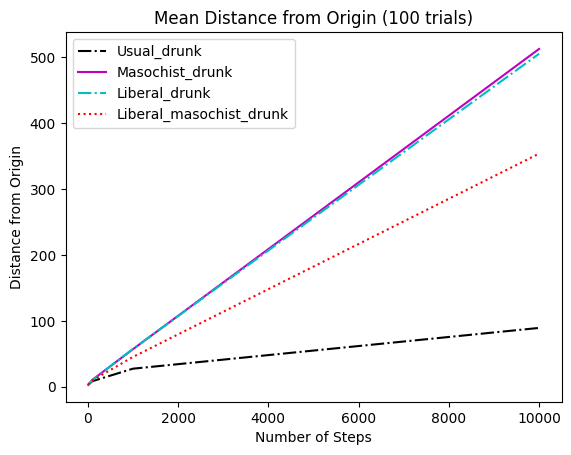

In [16]:
def sim_drunk(num_trials, d_class, walk_lengths):
    mean_distances = []
    for num_steps in walk_lengths:
        print('Starting simulation of', num_steps, 'steps')
        trials = sim_walks(num_steps, num_trials, d_class)
        mean = sum(trials)/len(trials)
        mean_distances.append(mean)
    return mean_distances

## sim_all that outputs a visualization
def sim_all(drunk_kinds, walk_lengths, num_trials):
    style_choice = Random_style_generator()
    for d_class in drunk_kinds:
        cur_style = style_choice.get_random_plot_style()
        print('Starting simulation of', d_class.__name__)
        means = sim_drunk(num_trials, d_class, walk_lengths)
        plt.plot(walk_lengths, means, cur_style,
                 label = d_class.__name__)
    plt.title(f'Mean Distance from Origin ({num_trials} trials)')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc = 'best')


random.seed(0)
num_steps = (10, 100, 1000, 10000)
sim_all((Usual_drunk, Masochist_drunk, Liberal_drunk,
         Liberal_masochist_drunk), num_steps, 100)
plt.legend(loc = 'best')

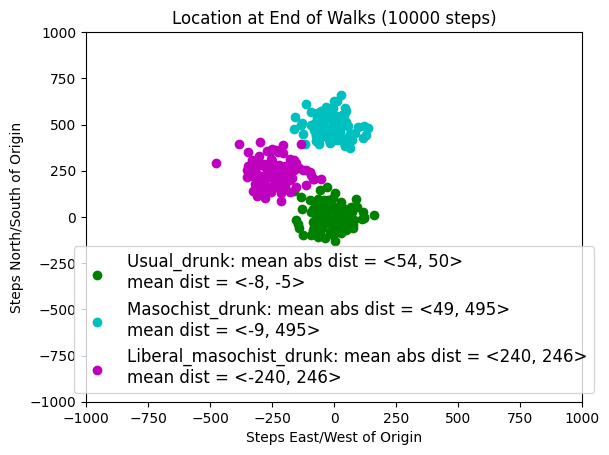

In [18]:
import numpy as np
def sim_final_locs(num_steps, num_trials, d_class):
    locs = []
    d = d_class()
    for t in range(num_trials):
        f = Field()
        f.add_drunk(d, Location(0, 0))
        for s in range(num_steps):
            f.move_drunk(d)
        locs.append(f.get_loc(d))
    return locs

def plot_locs(drunk_kinds, num_steps, num_trials):
    style_choice = Random_style_generator()
    for d_class in drunk_kinds:
        locs = sim_final_locs(num_steps, num_trials, d_class)
        x_vals, y_vals = [], []
        for loc in locs:
            x_vals.append(loc.getX())
            y_vals.append(loc.getY())
        x_vals = np.array(x_vals)
        y_vals = np.array(y_vals)
        mean_x = round(sum(x_vals)/len(x_vals))
        mean_y = round(sum(y_vals)/len(y_vals))
        abs_mean_x = round(sum(abs(x_vals))/len(x_vals))
        abs_mean_y = round(sum(abs(y_vals))/len(y_vals))
        cur_style = style_choice.get_random_plot_style()
        plt.scatter(x_vals, y_vals, color = cur_style[0],
                     label = d_class.__name__ + ':' +
                     ' mean abs dist = <'
                     + str(abs_mean_x) + ', ' + str(abs_mean_y) + '>\n'
                     'mean dist = <'+str(mean_x) + ', '+str(mean_y)+'>')
    plt.title('Location at End of Walks (' + str(num_steps) + ' steps)')
    plt.ylim(-1000, 1000)
    plt.xlim(-1000, 1000)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'lower center', fontsize = 'large')


random.seed(1)
plot_locs((Usual_drunk, Masochist_drunk, Liberal_masochist_drunk), 10000, 100)
